In [2]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from datasets import load_dataset
data = pd.read_csv(r'c:\Users\Uday\Downloads\dataset - 2020-09-24 (1).csv')

data.fillna(0, inplace=True)
data['Age'] = data['Age'].astype('int64')
data


C:\Users\Uday\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,0.0
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25,160,90,37,7,...,0.0,0.0,0.0,0.0,0.0,0.0,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23,16,7,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0,9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20,31,14,7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29,78,32,23,32,...,0.0,0.0,0.0,0.0,0.0,0.0,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24,105,27,47,5,...,0.0,0.0,0.0,0.0,0.0,0.0,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0


In [3]:
top_scorers_df = data.loc[data.groupby('Club')['Goals'].idxmax()]
top_scorers_df = top_scorers_df.sort_values(by ='Goals', ascending  = False)
top_scorers_df = top_scorers_df[['Name', 'Goals', 'Club']].head(10)
top_scorers_df
# Reset index for clean dataframe
top_scorers_df.reset_index(drop=True, inplace = True)
top_scorers_df

#print(top_scorers_df)

,Name,Goals,Club
0,Sergio Agüero,180,Manchester-City
1,Harry Kane,144,Tottenham-Hotspur
2,Jamie Vardy,105,Leicester-City
3,Olivier Giroud,86,Chelsea
4,Sadio Mané,86,Liverpool
5,Theo Walcott,75,Everton
6,Christian Benteke,72,Crystal-Palace
7,Pierre-Emerick Aubameyang,55,Arsenal
8,Shane Long,55,Southampton
9,Andy Carroll,53,Newcastle-United


C:\Users\Uday\AppData\Local\Temp\ipykernel_2628\3363123270.py:21: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  ax = sns.barplot(


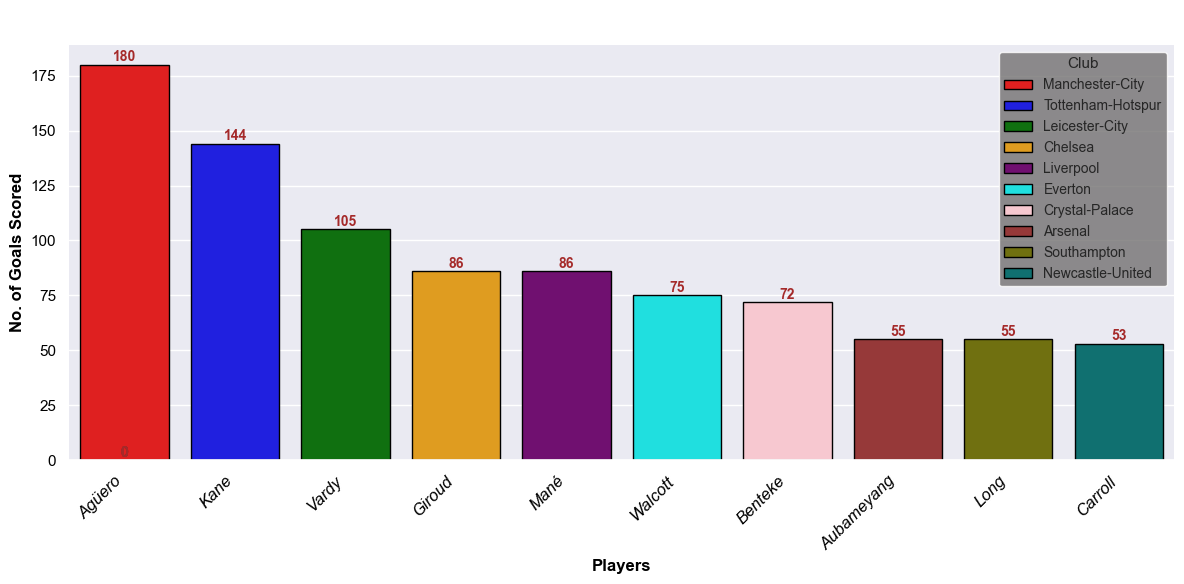

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid') 


# Extract last names
top_scorers_df['last_name'] = top_scorers_df['Name'].apply(lambda x: x.split()[-1])

# Custom colors
custom_colors = [
    'red', 'blue', 'green', 'orange', 'purple',
    'cyan', 'pink', 'brown', 'olive', 'teal',
    'gold', 'navy', 'magenta', 'gray', 'coral',
    'lime', 'maroon', 'indigo', 'skyblue', 'darkgreen'
]

# Barplot
fig = plt.figure(figsize=(12,6))

ax = sns.barplot(
    data=top_scorers_df,
    x='last_name',
    y='Goals',
    hue='Club',
    palette=custom_colors,
    edgecolor='black' 
)

# Annotate bar values
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height() + 0.2),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='brown'
    )


plt.xticks(rotation=45, ha='right', fontsize=12, fontstyle='italic', color='black')
plt.yticks(fontsize=11, color='black')
plt.ylabel('No. of Goals Scored', fontsize=12, fontweight='bold', color='black')
plt.xlabel('Players', fontsize=12, fontweight='bold', color='black')
plt.title('Top 10 Active Players To Score The Most Goals for Their Teams', fontsize=14, fontweight='bold', color='white', pad=15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.legend(title='Club', title_fontsize=11, fontsize=10, loc='upper right', frameon=True, facecolor="#737171", edgecolor='white')

plt.tight_layout()
plt.show()
